<a href="https://colab.research.google.com/github/mtheogit/chatbot-final/blob/main/c%C3%B3digo_do_arroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes encontradas: ['grao_quebrado', 'graos_inteiros']
Found 155 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5695 - loss: 0.7803

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.5649 - loss: 0.7900 - val_accuracy: 0.6216 - val_loss: 0.6659
Epoch 2/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.5419 - loss: 0.7659 - val_accuracy: 0.3784 - val_loss: 0.6974
Epoch 3/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.4312 - loss: 0.6715 - val_accuracy: 0.9189 - val_loss: 0.6804
Epoch 4/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.6199 - loss: 0.6846 - val_accuracy: 0.4054 - val_loss: 0.6823
Epoch 5/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.5525 - loss: 0.6449 - val_accuracy: 0.5405 - val_loss: 0.6532
Epoch 6/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.7500 - loss: 0.6246 - val_accuracy: 0.8919 - val_loss: 0.5884
Epoch 7/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.6445 - loss: 0.5722 - val_accuracy: 0.9459 - val_loss: 0.5215
Epoch 8/160
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.7340 - loss: 0.5382 - val_accuracy: 0.8649 - val_loss: 0.4

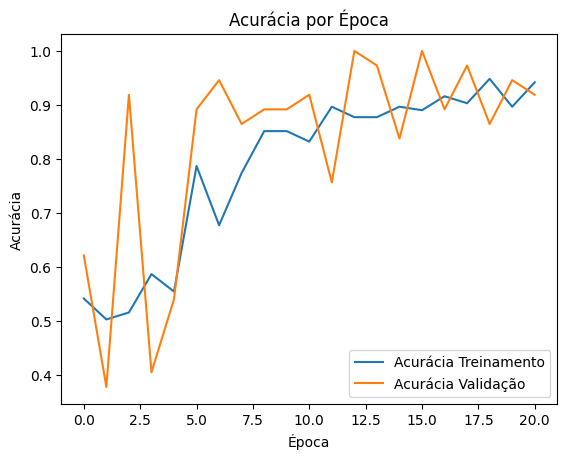

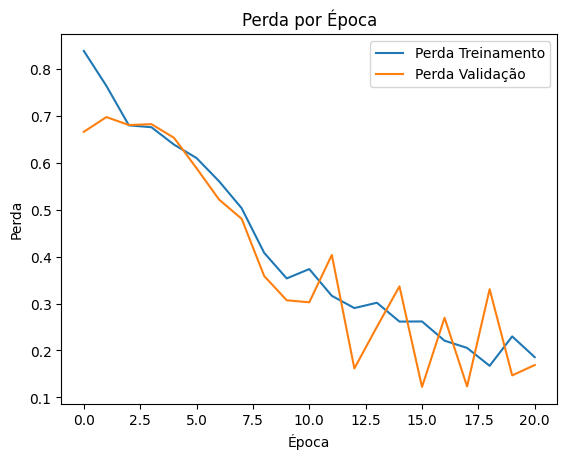

In [5]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/redes_arroz/dataset/dataset'

import os
print("Classes encontradas:", os.listdir(base_dir))

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

historico = model.fit(
    train_generator,
    epochs=160,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

validation_generator.reset()
predictions = model.predict(validation_generator)
y_pred = (predictions > 0.5).astype(int).reshape(-1)
y_true = validation_generator.classes

print("Matriz de Confusão:")
print(confusion_matrix(y_true, y_pred))

labels = list(range(len(validation_generator.class_indices)))
target_names = list(validation_generator.class_indices.keys())

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, labels=labels, target_names=target_names))

plt.plot(historico.history['accuracy'], label='Acurácia Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(historico.history['loss'], label='Perda Treinamento')
plt.plot(historico.history['val_loss'], label='Perda Validação')
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()
